<a href="https://colab.research.google.com/github/bitanb1999/Depression-Detection-vs-Sentiment-Analysis/blob/main/Depression_Visualisation_SST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ecco bertviz

     |████████████████████████████████| 70 kB 5.9 MB/s 
     |████████████████████████████████| 157 kB 26.1 MB/s 
     |████████████████████████████████| 22.3 MB 29.8 MB/s 
     |████████████████████████████████| 1.4 MB 39.2 MB/s 
     |████████████████████████████████| 636 kB 41.7 MB/s 
     |████████████████████████████████| 4.0 MB 40.1 MB/s 
     |████████████████████████████████| 895 kB 41.3 MB/s 
     |████████████████████████████████| 6.5 MB 39.9 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
     |████████████████████████████████| 1.2 MB 37.2 MB/s 
     |████████████████████████████████| 132 kB 50.8 MB/s 
     |████████████████████████████████| 8.6 MB 41.6 MB/s 
     |████████████████████████████████| 79 kB 8.7 MB/s 
     |████████████████████████████████| 138 kB 51.1 MB/s 
     |████████████████████████████████| 127 kB 38.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uni

In [ ]:
!git clone https://github.com/swcwang/depression-detection.git

Cloning into 'depression-detection'...
remote: Enumerating objects: 178, done.
remote: Total 178 (delta 0), reused 0 (delta 0), pack-reused 178
Receiving objects: 100% (178/178), 1.51 MiB | 15.67 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [ ]:
!pip install transformers
!pip install seaborn
import torch
from transformers import BertConfig,BertTokenizer,  BertModel

In [ ]:
model_type = 'yoshitomo-matsubara/bert-base-uncased-sst2'
config = BertConfig.from_pretrained(model_type)
config.output_attentions=True
model = BertModel.from_pretrained(model_type,config = config).to('cpu')
tokenizer = BertTokenizer.from_pretrained(model_type)

Downloading:   0%|          | 0.00/697 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

Some weights of the model checkpoint at yoshitomo-matsubara/bert-base-uncased-sst2 were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/303 [00:00<?, ?B/s]

In [ ]:
text1 = 'I am depressed I feel so terribly '
text2 = 'worthless around everyone  I speak to'
tok1 = tokenizer.tokenize(text1)
tok2 = tokenizer.tokenize(text2)

In [ ]:
#visualisation of a depression class text
p_pos = len(tok1) # position for token
tok = tok1+tok2
tok,p_pos, tok[p_pos]

(['i',
  'am',
  'depressed',
  'i',
  'feel',
  'so',
  'terribly',
  'worthless',
  'around',
  'everyone',
  'i',
  'speak',
  'to'],
 7,
 'worthless')

In [ ]:
ids = torch.tensor(tokenizer.convert_tokens_to_ids(tok)).unsqueeze(0).to('cpu')
with torch.no_grad():
    output = model(ids)
attentions = torch.cat(output[2]).to('cpu')
attentions.shape

torch.Size([12, 12, 13, 13])

In [ ]:
attentions = attentions.permute(2,1,0,3)
print(attentions.shape)

torch.Size([13, 12, 12, 13])


In [ ]:
layers = len(attentions[0][0])
heads = len(attentions[0])
seqlen = len(attentions)
layers,heads,seqlen

(12, 12, 13)

In [ ]:
attentions_pos = attentions[p_pos]
attentions_pos.shape

torch.Size([12, 12, 13])

Attention weights for token worthless


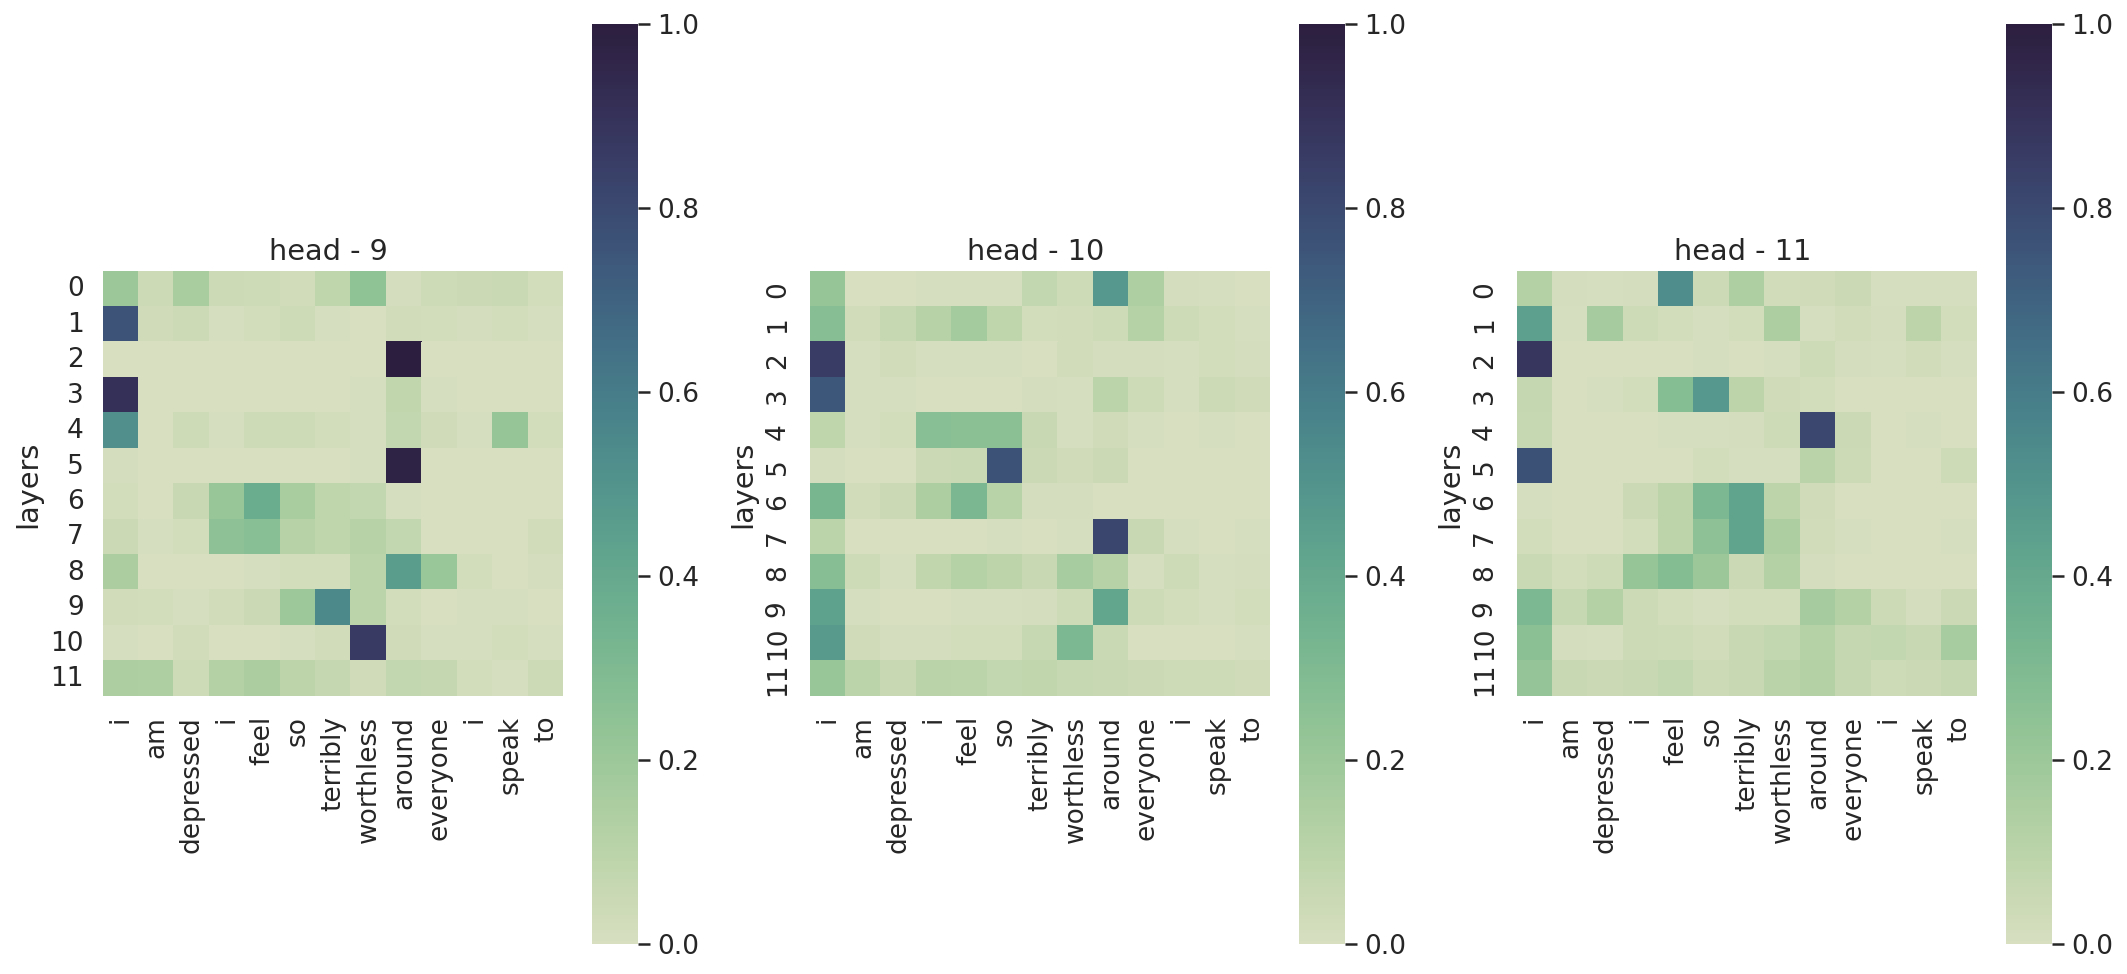

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots( 1,3, figsize = (15,7))
axes = axes.flat
sum=np.zeros((12,13))
print (f'Attention weights for token {tok[p_pos]}')
for i,att in enumerate(attentions_pos[9:]):
    sum=[[sum[i][j] + att[i][j]  for j in range
(len(sum[0]))] for i in range(len(sum))]
    im = axes[i].imshow(att, cmap='gray')
    sns.heatmap(att,vmin = 0, vmax = 1,ax = axes[i], xticklabels = tok,cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
    axes[i].set_title(f'head - {i+9} ' )
    axes[i].set_ylabel('layers')
    fig.tight_layout()
#plt.suptitle('Attention for i in a depressed class text')
plt.savefig(f'base_attention_depression_')


Attention weights for token worthless


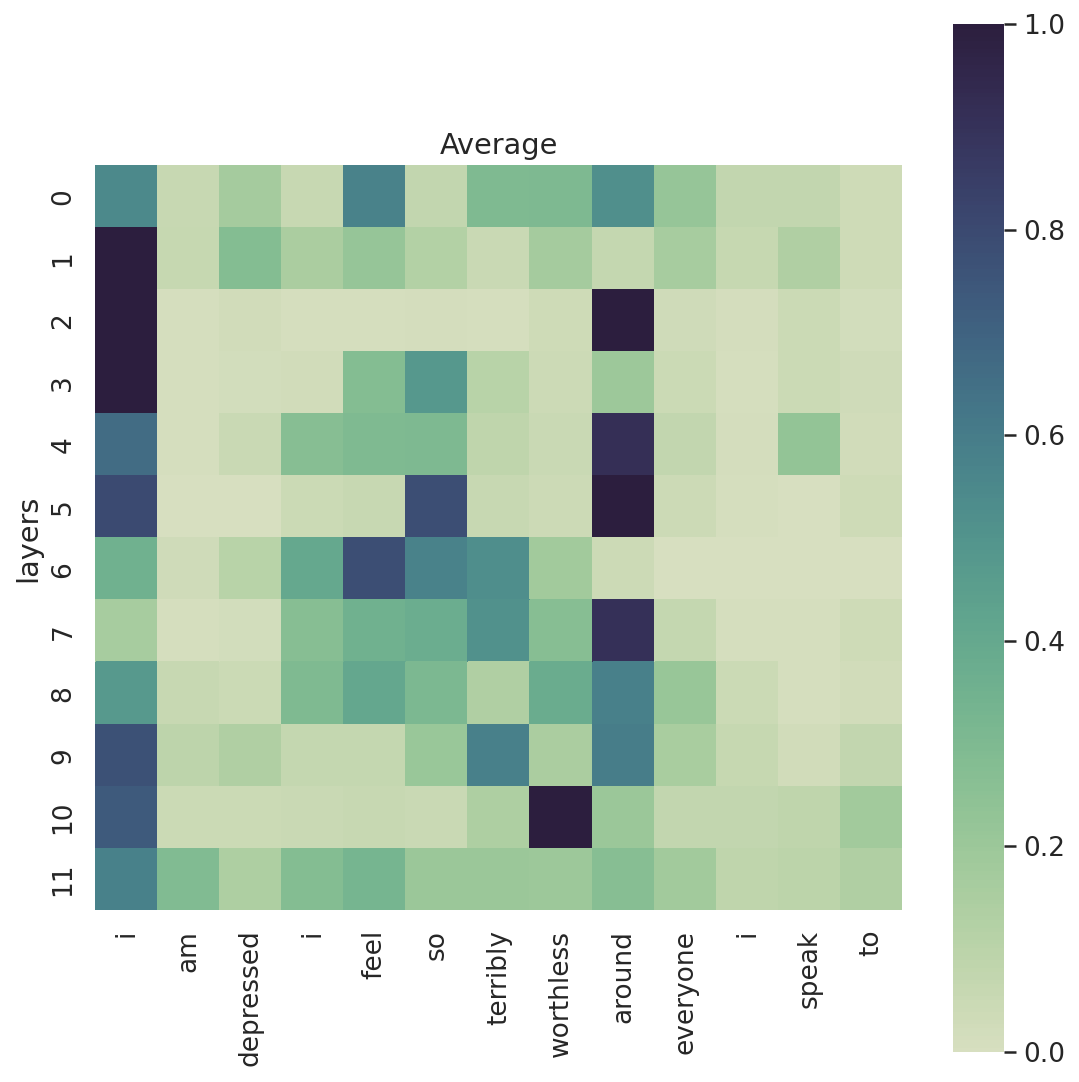

In [ ]:
fig, axes = plt.subplots( 1,1, figsize = (8,8))
print (f'Attention weights for token {tok[p_pos]}')
im = axes.imshow(att, cmap='gray')
sns.heatmap(sum,vmin = 0, vmax = 1,ax = axes, xticklabels = tok,cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
axes.set_title('Average' )
axes.set_ylabel('layers')
fig.tight_layout()
plt.savefig(f'base_attention_depression_average')

In [ ]:
text1 = 'Well i am alone and  i am just '
text2 = 'wondering how everyone is doing '
tok1 = tokenizer.tokenize(text1)
tok2 = tokenizer.tokenize(text2)

In [ ]:
#visualisation of no depression class
p_pos = len(tok1) # position for token
tok = tok1+tok2
tok,p_pos, tok[p_pos]

(['well',
  'i',
  'am',
  'alone',
  'and',
  'i',
  'am',
  'just',
  'wondering',
  'how',
  'everyone',
  'is',
  'doing'],
 8,
 'wondering')

In [ ]:
ids = torch.tensor(tokenizer.convert_tokens_to_ids(tok)).unsqueeze(0).to('cpu')
with torch.no_grad():
    output = model(ids)
attentions = torch.cat(output[2]).to('cpu')
attentions.shape

torch.Size([12, 12, 13, 13])

In [ ]:
attentions = attentions.permute(2,1,0,3)
print(attentions.shape)

torch.Size([13, 12, 12, 13])


Attention weights for token wondering


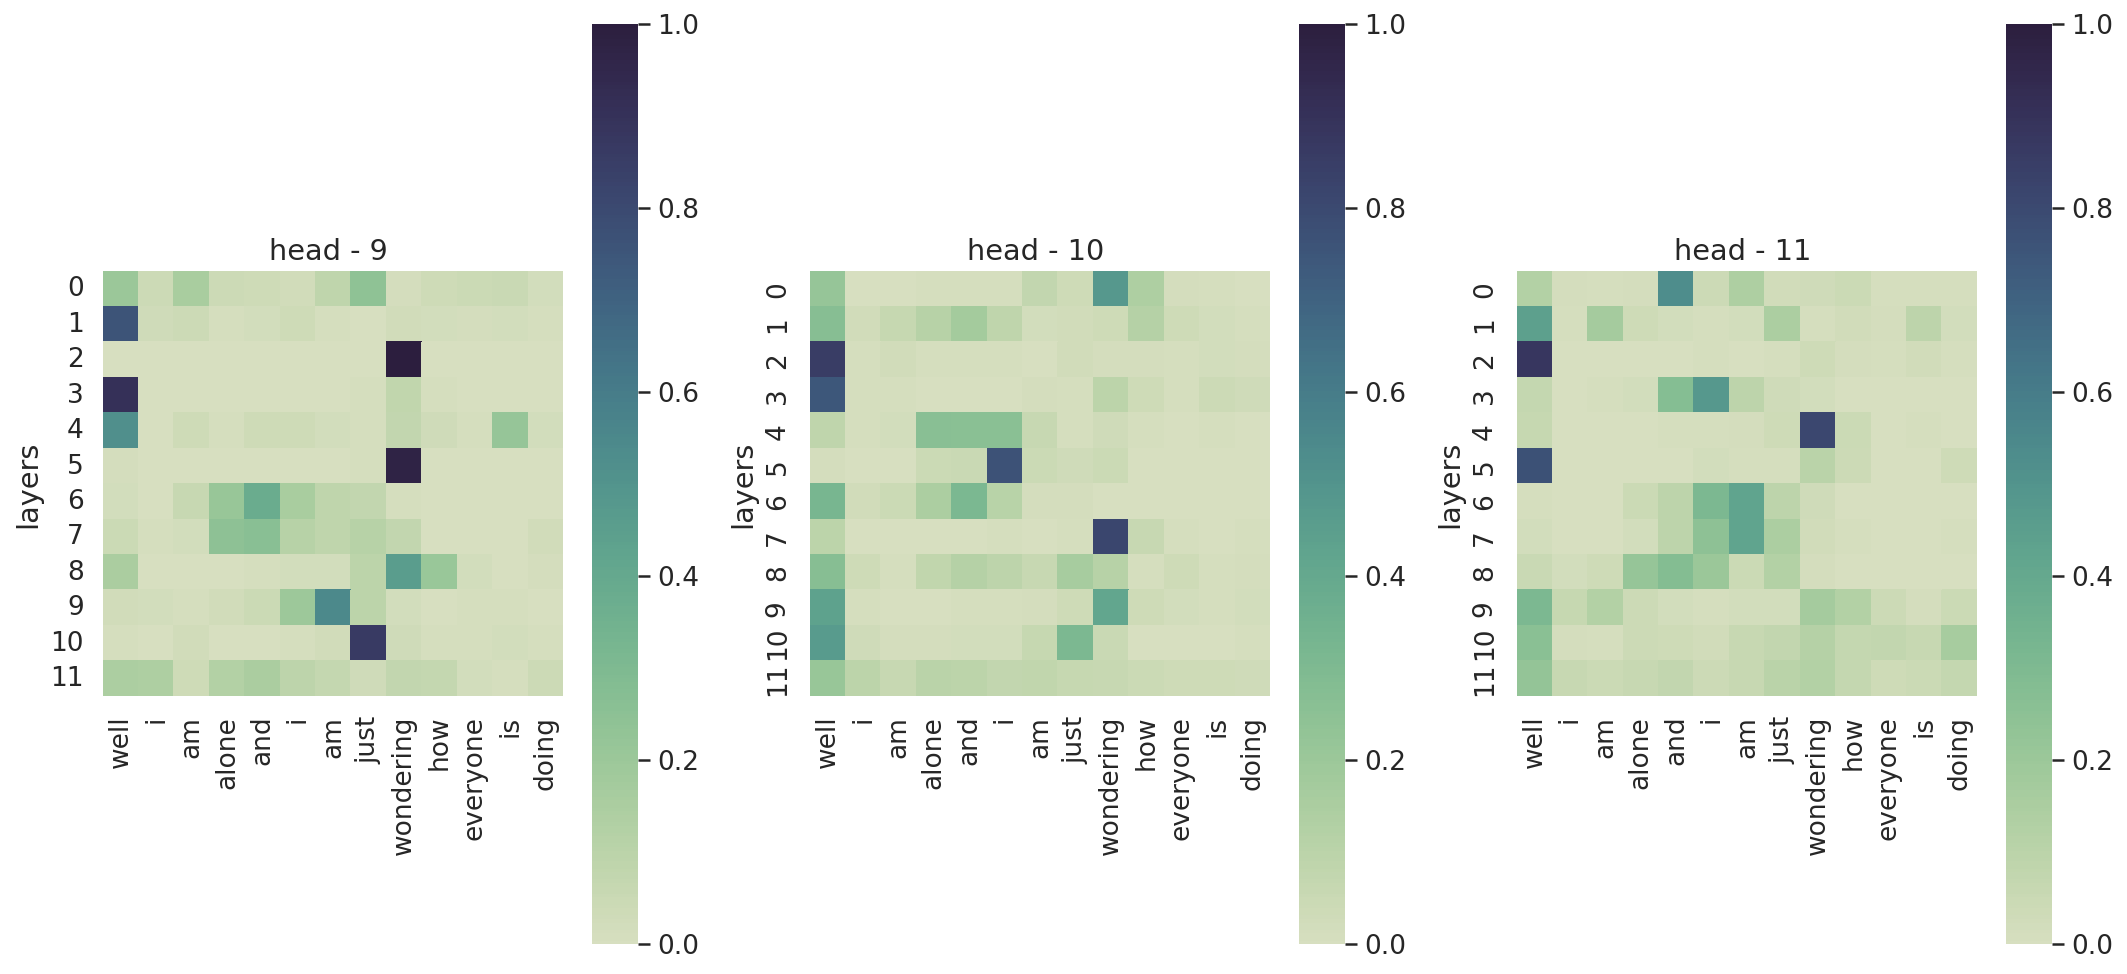

In [ ]:
fig, axes = plt.subplots( 1,3, figsize = (15,7))
axes = axes.flat
sum=np.zeros((12,13))
print (f'Attention weights for token {tok[p_pos]}')
for i,att in enumerate(attentions_pos[9:]):
    sum=[[sum[i][j] + att[i][j]  for j in range
(len(sum[0]))] for i in range(len(sum))]
    im = axes[i].imshow(att, cmap='gray')
    sns.heatmap(att,vmin = 0, vmax = 1,ax = axes[i], xticklabels = tok,cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
    axes[i].set_title(f'head - {i+9} ' )
    axes[i].set_ylabel('layers')
    fig.tight_layout()
#plt.suptitle('Attention for i in a non-depressed class text')
plt.savefig(f'base_attention_nondepression')

Attention weights for token wondering


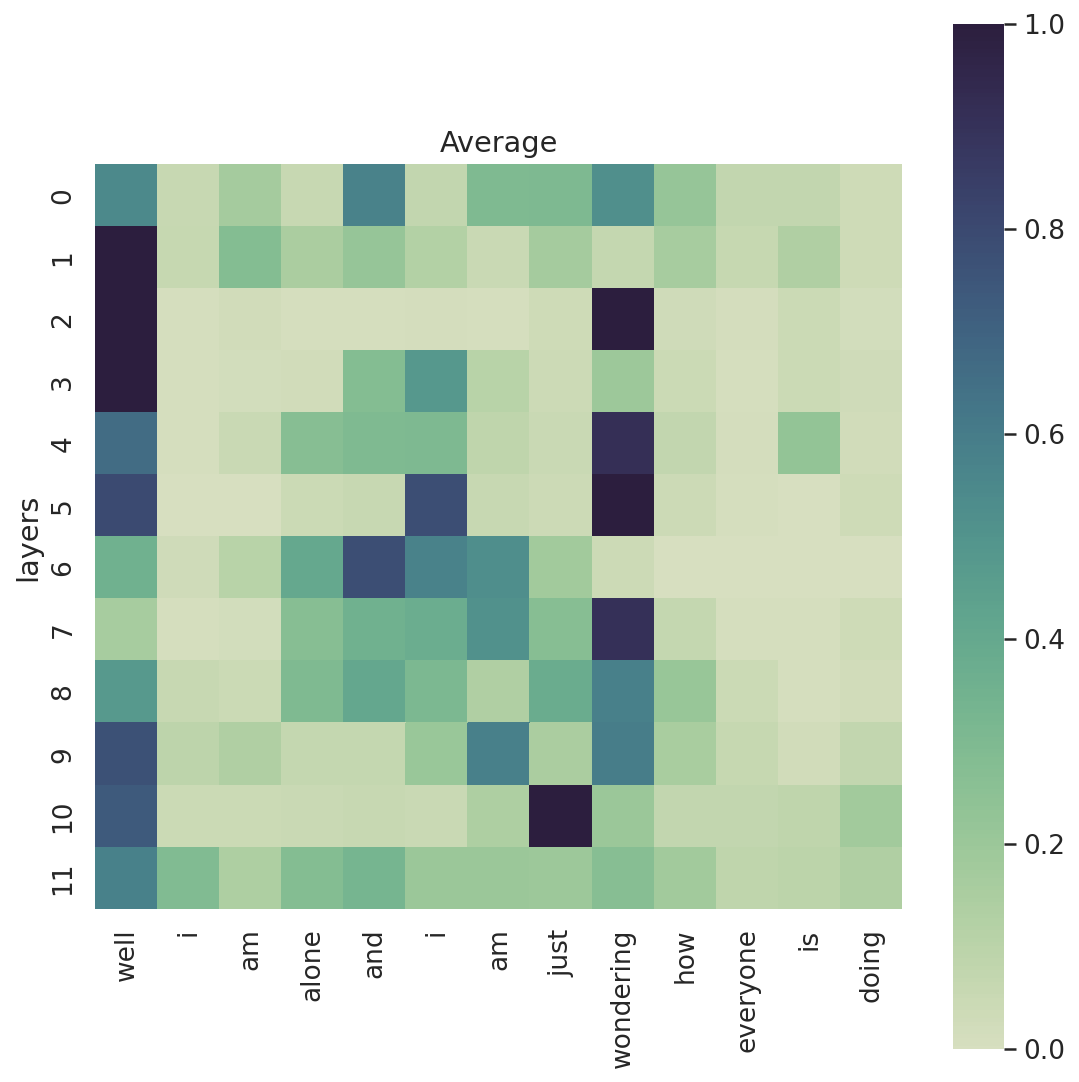

In [ ]:
fig, axes = plt.subplots( 1,1, figsize = (8,8))
print (f'Attention weights for token {tok[p_pos]}')
im = axes.imshow(att, cmap='gray')
sns.heatmap(sum,vmin = 0, vmax = 1,ax = axes, xticklabels = tok,cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
axes.set_title('Average' )
axes.set_ylabel('layers')
fig.tight_layout()
plt.savefig(f'attention-nondepression_average_singlesample')

In [ ]:
text1 = 'It makes me happy and content when I'
text2 = 'spend time with my family'
tok1 = tokenizer.tokenize(text1)
tok2 = tokenizer.tokenize(text2)
ids = torch.tensor(tokenizer.convert_tokens_to_ids(tok)).unsqueeze(0).to('cpu')
with torch.no_grad():
    output = model(ids)
attentions = torch.cat(output[2]).to('cpu')
attentions.shape

torch.Size([12, 12, 13, 13])

In [ ]:
p_pos = len(tok1) # position for token
tok = tok1+tok2
tok,p_pos, tok[p_pos]

(['it',
  'makes',
  'me',
  'happy',
  'and',
  'content',
  'when',
  'i',
  'spend',
  'time',
  'with',
  'my',
  'family'],
 8,
 'spend')

In [ ]:
attentions = attentions.permute(2,1,0,3)
print(attentions.shape)

torch.Size([13, 12, 12, 13])


In [ ]:
layers = len(attentions[0][0])
heads = len(attentions[0])
seqlen = len(attentions)
layers,heads,seqlen

(12, 12, 13)

Attention weights for token spend


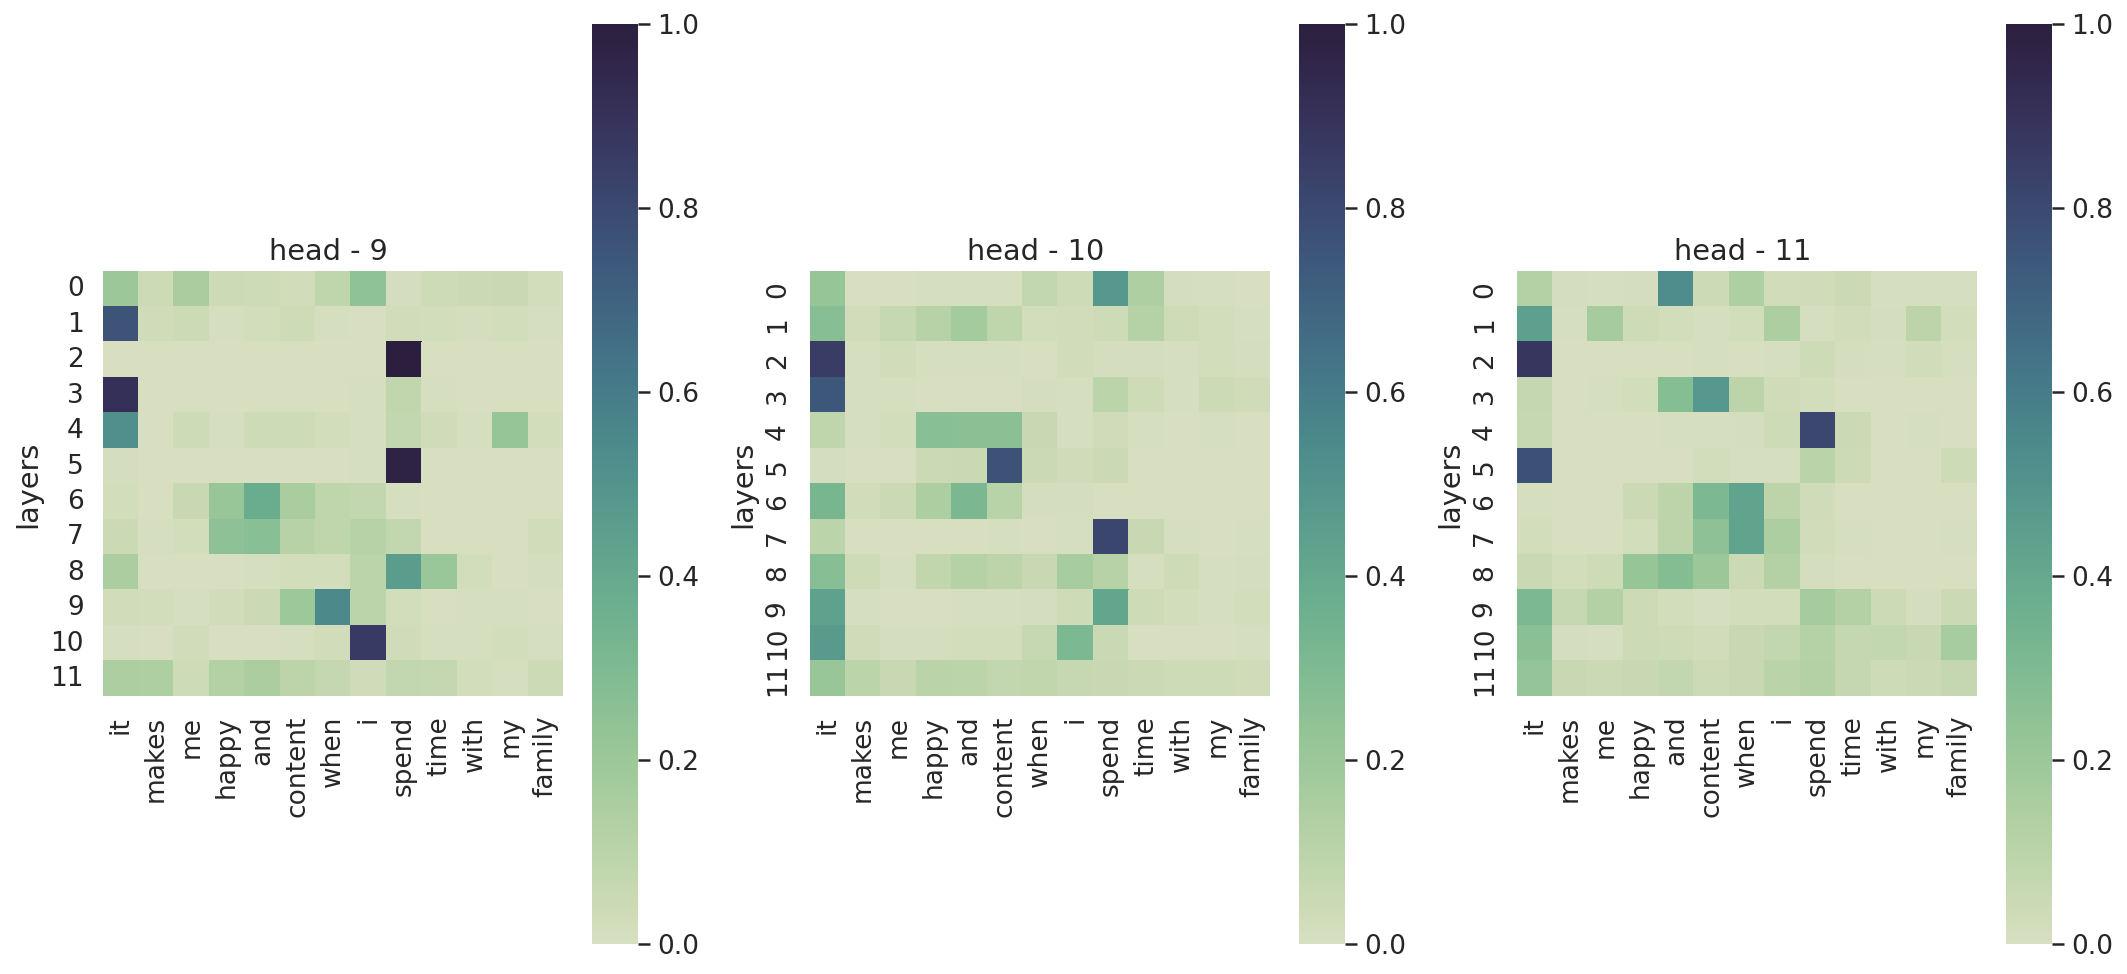

In [ ]:
fig, axes = plt.subplots( 1,3, figsize = (15,7))
axes = axes.flat
sum=np.zeros((12,13))
print (f'Attention weights for token {tok[p_pos]}')
for i,att in enumerate(attentions_pos[9:]):
    sum=[[sum[i][j] + att[i][j]  for j in range
(len(sum[0]))] for i in range(len(sum))]
    im = axes[i].imshow(att, cmap='gray')
    sns.heatmap(att,vmin = 0, vmax = 1,ax = axes[i], xticklabels = tok,cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
    axes[i].set_title(f'head - {i+9} ' )
    axes[i].set_ylabel('layers')
    fig.tight_layout()
#plt.suptitle('Attention for i in a non-depressed class text')
plt.savefig(f'base_attention_nondepression2')

Attention weights for token spend


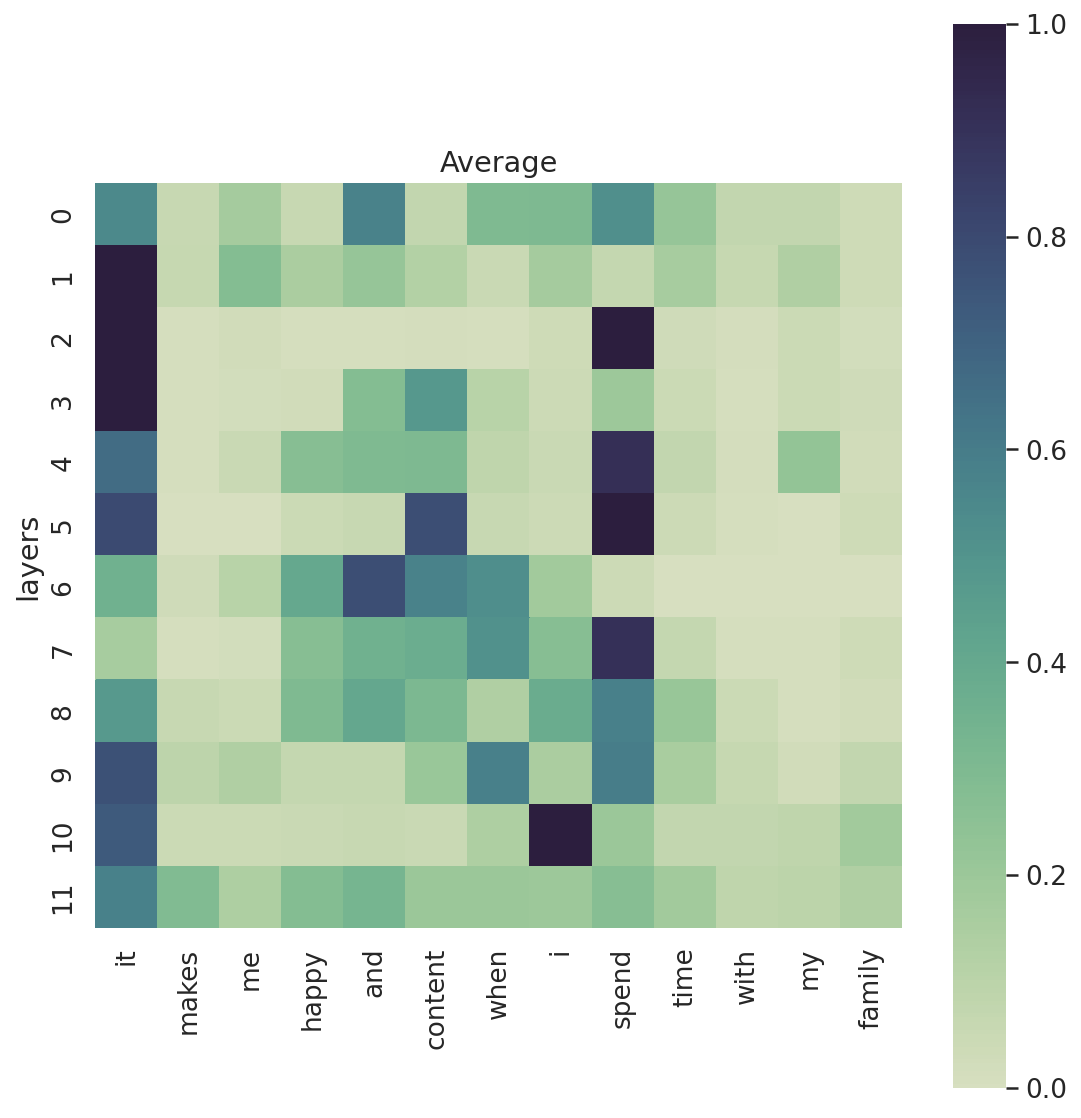

In [ ]:
fig, axes = plt.subplots( 1,1, figsize = (8,8))
print (f'Attention weights for token {tok[p_pos]}')
im = axes.imshow(att, cmap='gray')
sns.heatmap(sum,vmin = 0, vmax = 1,ax = axes, xticklabels = tok,cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
axes.set_title('Average' )
axes.set_ylabel('layers')
fig.tight_layout()
plt.savefig(f'base_attention-nondepression_average2')

In [ ]:
text1 = 'I do not want to wake up tomorrow '
text2 = 'lost my will to live'
tok1 = tokenizer.tokenize(text1)
tok2 = tokenizer.tokenize(text2)
ids = torch.tensor(tokenizer.convert_tokens_to_ids(tok)).unsqueeze(0).to('cpu')
with torch.no_grad():
    output = model(ids)
attentions = torch.cat(output[2]).to('cpu')
attentions.shape

torch.Size([12, 12, 13, 13])

In [ ]:
p_pos = len(tok1) # position for token
tok = tok1+tok2
tok,p_pos, tok[p_pos]

(['i',
  'do',
  'not',
  'want',
  'to',
  'wake',
  'up',
  'tomorrow',
  'lost',
  'my',
  'will',
  'to',
  'live'],
 8,
 'lost')

In [ ]:
attentions = attentions.permute(2,1,0,3)
print(attentions.shape)

torch.Size([13, 12, 12, 13])


In [ ]:
layers = len(attentions[0][0])
heads = len(attentions[0])
seqlen = len(attentions)
layers,heads,seqlen

(12, 12, 13)

Attention weights for token lost


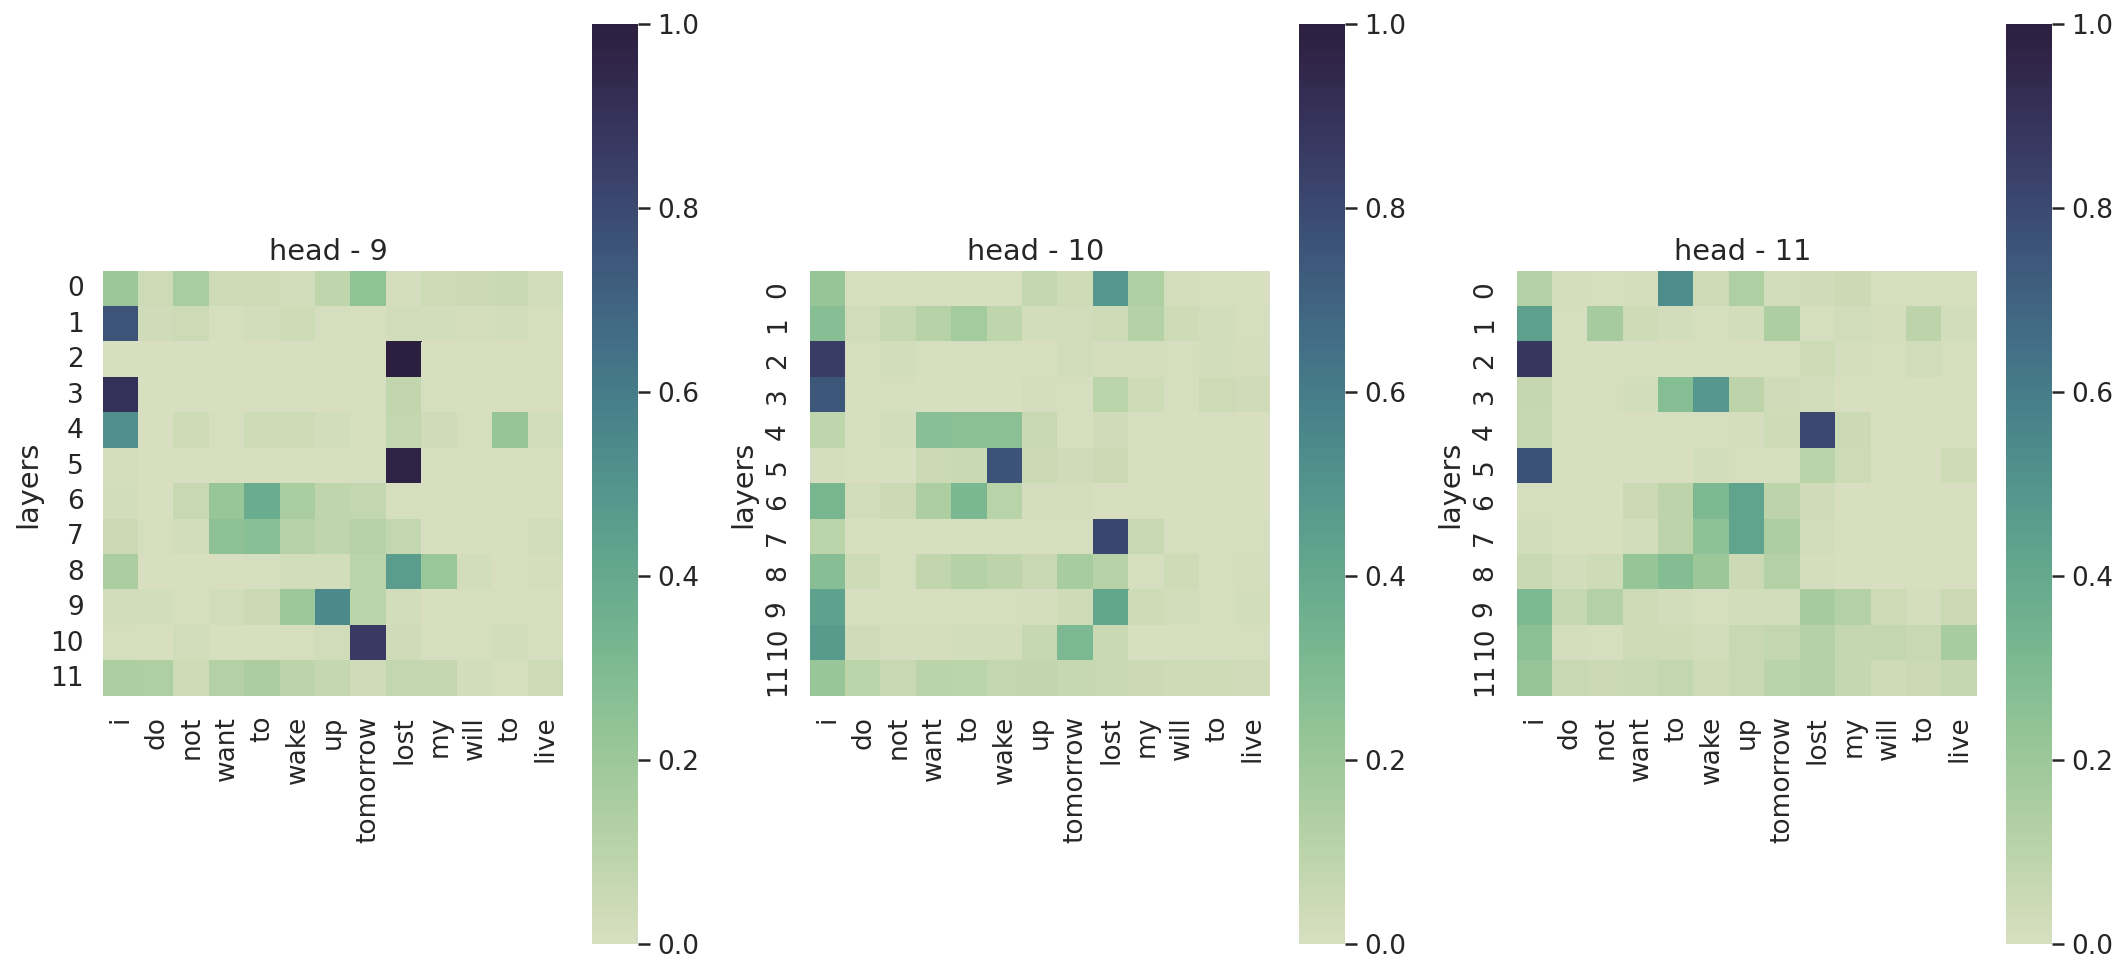

In [ ]:
fig, axes = plt.subplots( 1,3, figsize = (15,7))
axes = axes.flat
sum=np.zeros((12,13))
print (f'Attention weights for token {tok[p_pos]}')
for i,att in enumerate(attentions_pos[9:]):
    sum=[[sum[i][j] + att[i][j]  for j in range
(len(sum[0]))] for i in range(len(sum))]
    im = axes[i].imshow(att, cmap='gray')
    sns.heatmap(att,vmin = 0, vmax = 1,ax = axes[i], xticklabels = tok,cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
    axes[i].set_title(f'head - {i+9} ' )
    axes[i].set_ylabel('layers')
    fig.tight_layout()
#plt.suptitle('Attention for i in a non-depressed class text')
plt.savefig(f'base_attention_depression2')

Attention weights for token lost


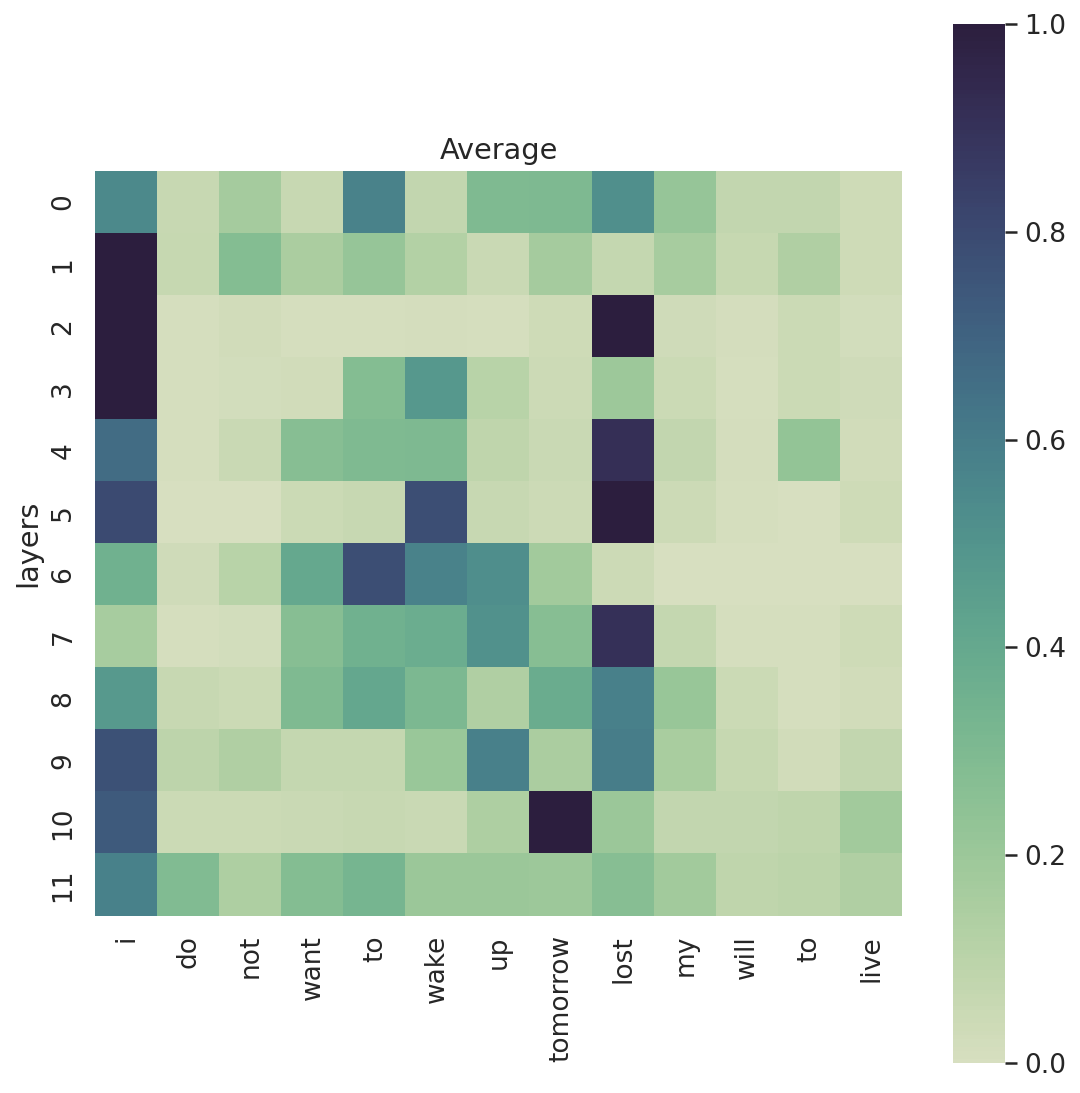

In [ ]:
fig, axes = plt.subplots( 1,1, figsize = (8,8))
print (f'Attention weights for token {tok[p_pos]}')
im = axes.imshow(att, cmap='gray')
sns.heatmap(sum,vmin = 0, vmax = 1,ax = axes, xticklabels = tok,cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
axes.set_title('Average' )
axes.set_ylabel('layers')
fig.tight_layout()
plt.savefig(f'base_attention-depression_average2')

In [ ]:
import ecco
lm = ecco.from_pretrained('bert-base-uncased', activations=True)

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
text = 'I am having a bad day.I do not know what is wrong with me. I spent the past few days in post-holiday burnout and I feel so low.Lower than I have in a long time. I feel like I should kill myself.'
inputs = lm.tokenizer([text], return_tensors="pt")
output = lm(inputs)

In [ ]:
nmf_2 = output.run_nmf(n_components=8, from_layer=0, to_layer=12)
nmf_2.explore()

<IPython.core.display.Javascript object>

In [ ]:
inputs = tokenizer.encode_plus(text1, text2, return_tensors='pt')
input_ids = inputs['input_ids']
token_type_ids = inputs['token_type_ids']
attention = model(input_ids, token_type_ids=token_type_ids)[-1]
sentence_b_start = token_type_ids[0].tolist().index(1)
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list)

In [ ]:
from bertviz import head_view, model_view
head_view(attention, tokens, sentence_b_start)

<IPython.core.display.Javascript object>

In [ ]:
model_view(attention, tokens, sentence_b_start)

<IPython.core.display.Javascript object>

In [ ]:
import transformers
import seaborn as sns
import numpy as np
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#sentiment-score and labels correlation
import pandas as pd
df=pd.read_csv('/content/train.tsv',sep='\t')
df.head()

PID                                          Text_data     Label
0  train_pid_1  Waiting for my mind to have a breakdown once t...  moderate
1  train_pid_2  My new years resolution : I'm gonna get my ass...  moderate
2  train_pid_3  New year : Somone else Feeling like 2020 will ...  moderate
3  train_pid_4  My story I guess : Hi, Im from Germany and my ...  moderate
4  train_pid_5  Sat in the dark and cried myself going into th...  moderate

In [ ]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['Text_data']]
df['sentiment_score'] = polarity
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


PID                                          Text_data     Label  \
0  train_pid_1  Waiting for my mind to have a breakdown once t...  moderate   
1  train_pid_2  My new years resolution : I'm gonna get my ass...  moderate   
2  train_pid_3  New year : Somone else Feeling like 2020 will ...  moderate   
3  train_pid_4  My story I guess : Hi, Im from Germany and my ...  moderate   
4  train_pid_5  Sat in the dark and cried myself going into th...  moderate   

   sentiment_score  
0            -0.93  
1            -0.62  
2            -0.13  
3             0.98  
4             0.36

In [ ]:
#visualisation of sentiment and label distribution(considering only severe and no depression)
label_dict={}
l=0;
for i in ['not depression','moderate','severe']:
  label_dict[i]=l
  l+=1
df['Label']=df['Label'].apply(lambda x:label_dict[x])
df.head()

PID                                          Text_data  Label  \
0  train_pid_1  Waiting for my mind to have a breakdown once t...      1   
1  train_pid_2  My new years resolution : I'm gonna get my ass...      1   
2  train_pid_3  New year : Somone else Feeling like 2020 will ...      1   
3  train_pid_4  My story I guess : Hi, Im from Germany and my ...      1   
4  train_pid_5  Sat in the dark and cried myself going into th...      1   

   sentiment_score  
0            -0.93  
1            -0.62  
2            -0.13  
3             0.98  
4             0.36

In [ ]:
import scipy.stats as stats
#calculate point-biserial correlation
stats.pointbiserialr(df['Label'],df['sentiment_score'])

PointbiserialrResult(correlation=-0.24574117933065973, pvalue=2.016618788565067e-122)

In [ ]:
df_new=df.iloc[list(set(list(df[df.Label==2][:901].index)).union(set(list(df[df.Label==0][:901].index))))].reset_index().drop('index',axis=1)
stats.pointbiserialr(df_new['Label'],df_new['sentiment_score'])

PointbiserialrResult(correlation=-0.48890274705031495, pvalue=6.563677071073803e-109)

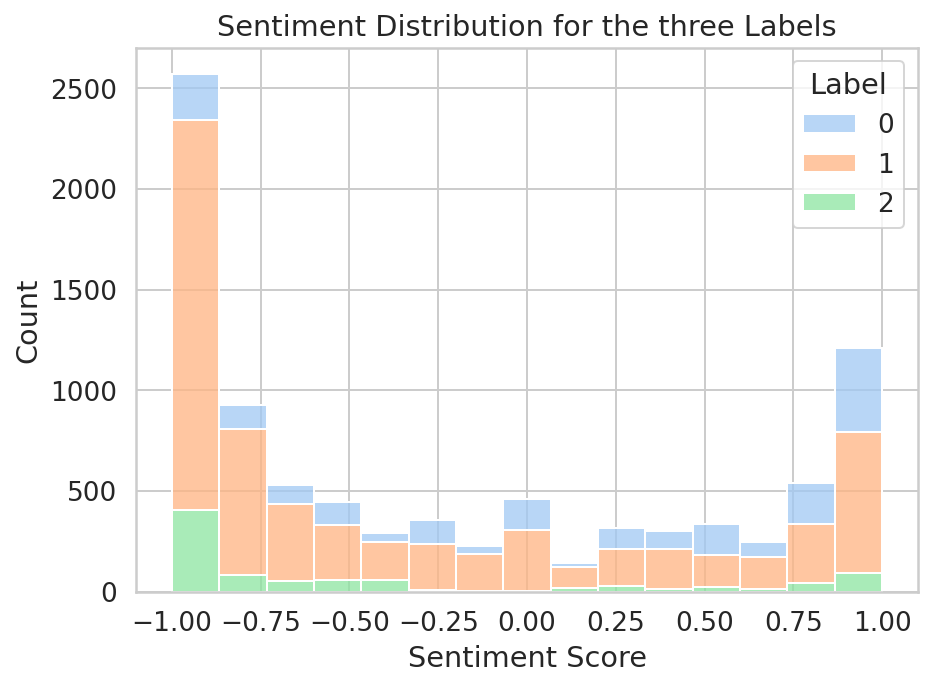

In [ ]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)

# mock your data frame
import numpy as np
# plot
sns.histplot(data=df, ax=ax, stat="count", multiple="stack",
             x="sentiment_score", kde=False,
             palette="pastel", hue="Label",
             element="bars", legend=True)
#ax.set_title("Seaborn Stacked Histogram")
ax.set_xlabel("Sentiment Score")
ax.set_ylabel("Count")
plt.title('Sentiment Distribution for the three Labels')
plt.savefig('sentimentdist')

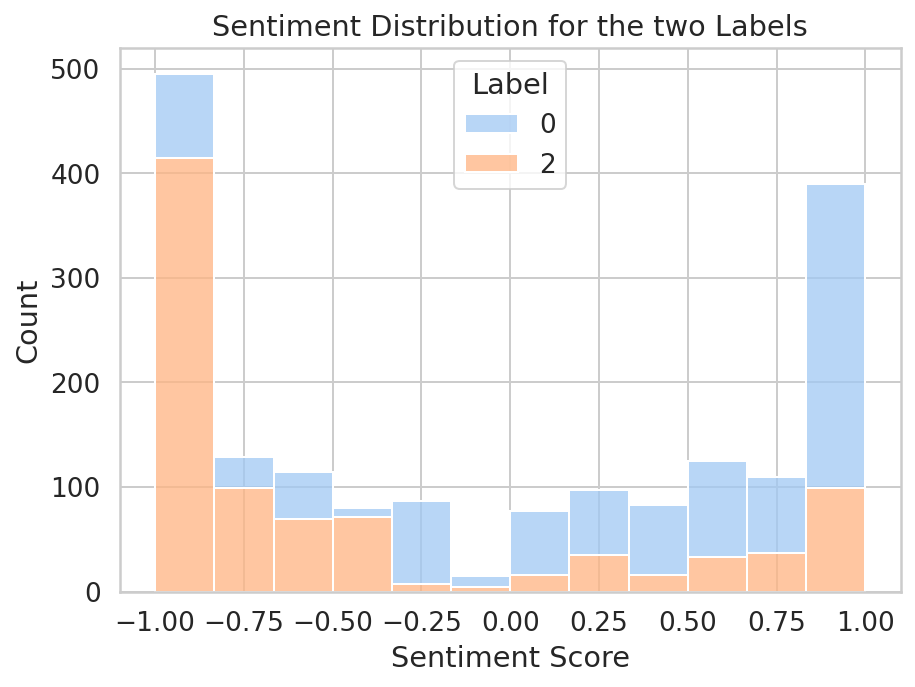

In [ ]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)

# mock your data frame
import numpy as np
# plot
sns.histplot(data=df_new, ax=ax, stat="count", multiple="stack",
             x="sentiment_score", kde=False,
             palette="pastel", hue="Label",
             element="bars", legend=True)
#ax.set_title("Seaborn Stacked Histogram")
ax.set_xlabel("Sentiment Score")
ax.set_ylabel("Count")
plt.title('Sentiment Distribution for the two Labels')
plt.savefig('sentimentdist2')

In [ ]:
df_par=df[((df.Label==0)&(df.sentiment_score<0))|((df.Label==1)&(df.sentiment_score>0.5))|((df.Label==2)&(df.sentiment_score>0))]

In [ ]:
df_par.reset_index(inplace=True,drop=True)

In [ ]:
MAX_LEN = 512
bert_model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
class GPSentimentDataset(Dataset):
  def __init__(self, texts, targets, tokenizer, max_len):
    self.texts = texts
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  def __len__(self):
    return len(self.texts)
  def __getitem__(self, item):
    text = str(self.texts[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      text,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return {
      'text': text,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
df_train, df_val = train_test_split(
  df_par[['Text_data','Label']],
  test_size=0.1,
  random_state=RANDOM_SEED
)

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPSentimentDataset(
    texts=df.Text_data.to_numpy(),
    targets=df.Label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [ ]:
BATCH_SIZE = 8
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
data = next(iter(train_data_loader))
data.keys()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulti

dict_keys(['text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
model = BertModel.from_pretrained('yoshitomo-matsubara/bert-base-uncased-sst2')
tokenizer = BertTokenizer.from_pretrained('yoshitomo-matsubara/bert-base-uncased-sst2')

Some weights of the model checkpoint at yoshitomo-matsubara/bert-base-uncased-sst2 were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
class SentimentClassifier(nn.Module):
  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained('bert-base-uncased')
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,return_dict=False
    )
    output = self.drop(pooled_output,)
    return self.out(output)
model = SentimentClassifier(3)
model = model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

In [ ]:
EPOCHS = 4
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train()
  losses = []
  correct_predictions = 0
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)
      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')
  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )
  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulti

Train loss 0.8385205874840419 accuracy 0.6460176991150443


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val   loss 0.5260090640392797 accuracy 0.7787610619469026

Epoch 2/4
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.40875430486584996 accuracy 0.8618485742379548


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Val   loss 0.4491442576982081 accuracy 0.8672566371681416

Epoch 3/4
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Train loss 0.1789381864088058 accuracy 0.9523107177974435


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Val   loss 0.441200841467121 accuracy 0.8849557522123894

Epoch 4/4
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 0.07670763421383704 accuracy 0.9823008849557523


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Val   loss 0.3980511497457287 accuracy 0.8893805309734513

CPU times: user 26min 21s, sys: 15.4 s, total: 26min 36s
Wall time: 26min 49s


In [ ]:
hist={}
hist['train_acc']=[y.cpu() for y in history['train_acc']]
hist['val_acc']=[y.cpu() for y in history['val_acc']]
#hist['train_loss']=[y.cpu() for y in history['train_loss']]
#hist['val_loss']=[y.cpu() for y in history['val_loss']]

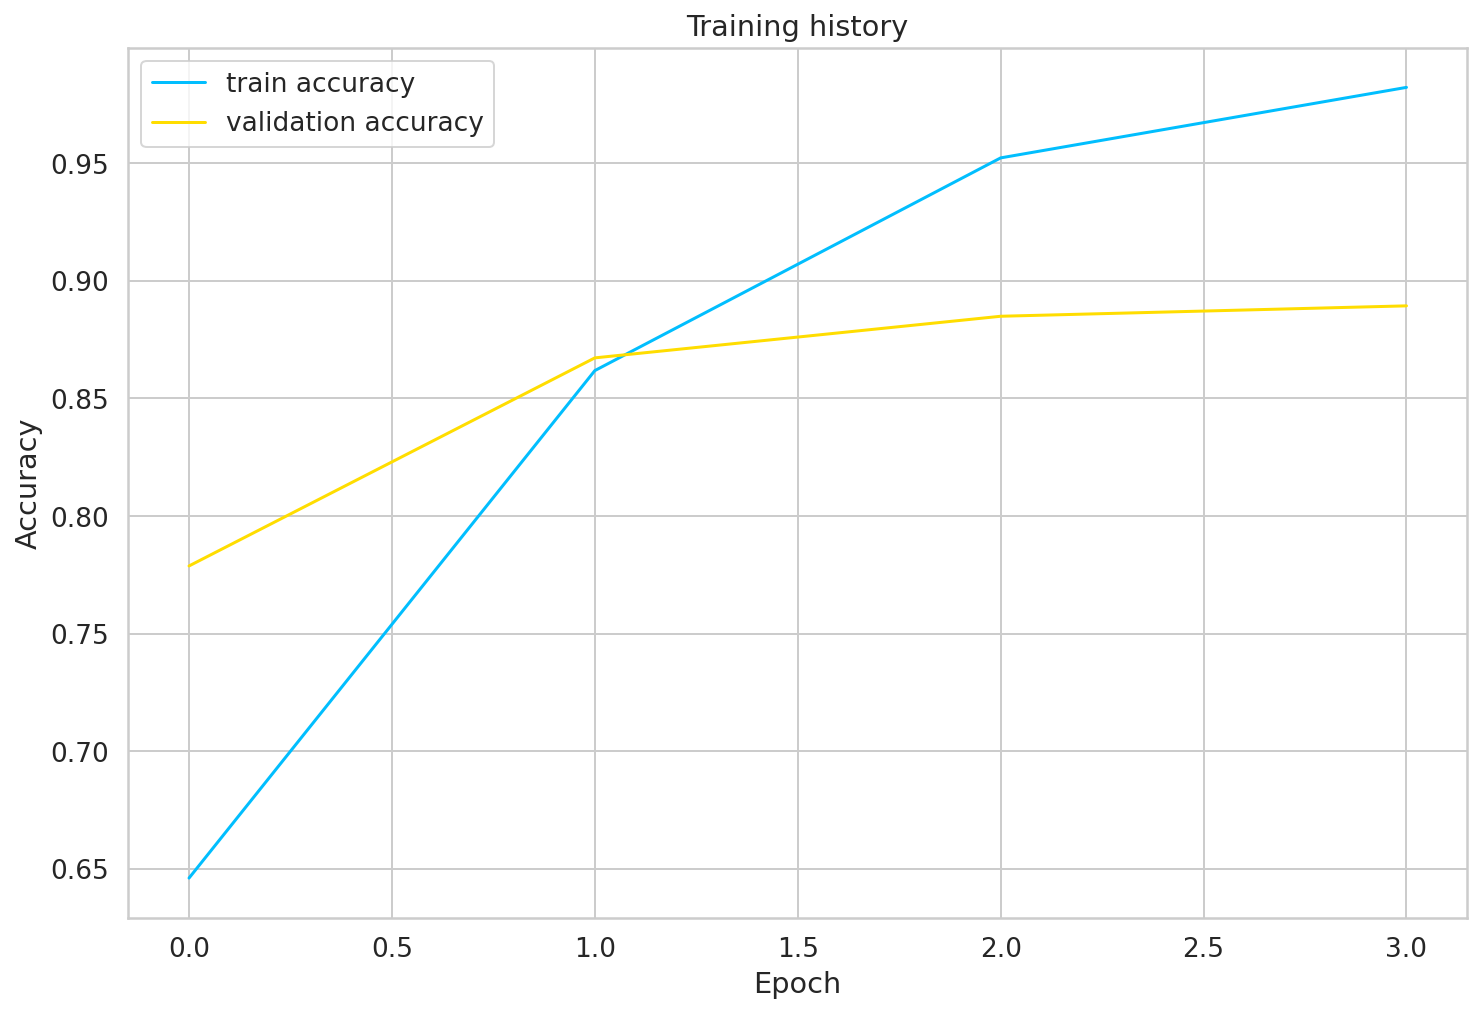

In [ ]:
plt.plot(hist['train_acc'], label='train accuracy')
plt.plot(hist['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      texts = d["text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(targets)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  train_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a

In [ ]:
print(classification_report(y_test, y_pred, target_names=['not depression','moderate','severe']))

                precision    recall  f1-score   support

not depression       1.00      0.99      1.00       685
      moderate       0.99      1.00      0.99      1139
        severe       0.98      0.95      0.96       210

      accuracy                           0.99      2034
     macro avg       0.99      0.98      0.98      2034
  weighted avg       0.99      0.99      0.99      2034



In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  val_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a

In [ ]:
print(classification_report(y_test, y_pred, target_names=['not depression','moderate','severe']))

                precision    recall  f1-score   support

not depression       0.96      0.84      0.90        82
      moderate       0.92      0.94      0.93       120
        severe       0.61      0.79      0.69        24

      accuracy                           0.89       226
     macro avg       0.83      0.86      0.84       226
  weighted avg       0.90      0.89      0.89       226

